## Introduction

In this project we'll look at improving the accuracy of a K-nearest neighbor model by augmenting the training dataset. The dataset we will be using is the MNIST database of handwritten digits. We will be classifying each digit (a possible 0 through 9) using a K-nearest neighbor model.

We will be augmenting the dataset by shifting the images in the training set in 4 directions (up, down, left and right) by a defined number of pixels to artifically inflate the training dataset, with the hope of improving accuracy.

## Imports

In [151]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [152]:
# Fetch dataset
mnist = fetch_openml('mnist_784', as_frame=False)
# Assign data and labels
X, y = mnist.data, mnist.target

## Crate Train/Test Split
Using an 80/20 train/test split.

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Augmentation
We will create a function to shift each image by a given number of pixels in in any of 4 directions: up, down, left and right.

### Shift Function

In [154]:
def shift_image(img_data, shift_px):
    # Reshape img data
    img_data = img_data.reshape(28,28)

    # Shift up image using np.roll
    up = np.roll(img_data, axis=0,shift=-shift_px)
    # Modiy shifted rows to 0
    up[28-shift_px:,:] = 0
    up = up.flatten()

    # Shift down image using np.roll
    down = np.roll(img_data, axis=0,shift=shift_px)
    # Modiy shifted rows to 0
    down[:shift_px,:] = 0
    down = down.flatten()

    # Shift left image using np.roll
    left = np.roll(img_data, axis=1,shift=-shift_px)
    # Modiy shifted rows to 0
    left[:,28-shift_px:] = 0
    left = left.flatten()

    # Shift right image using np.roll
    right = np.roll(img_data, axis=1,shift=shift_px)
    # Modiy shifted rows to 0
    right[:,:shift_px] = 0
    right = right.flatten()

    # Return to flat array
    return up, down, left, right

### Testing Shift Function
We will select a random image from the training set an visualise the shifted images returned by the shift function above.

In [155]:
# Select a random image index from test 
img_index = 24
# Get image data for index value
img_data = X[img_index]
# Call shift funtion with shift of 5px
up, down, left, right = shift_image(img_data, 5)

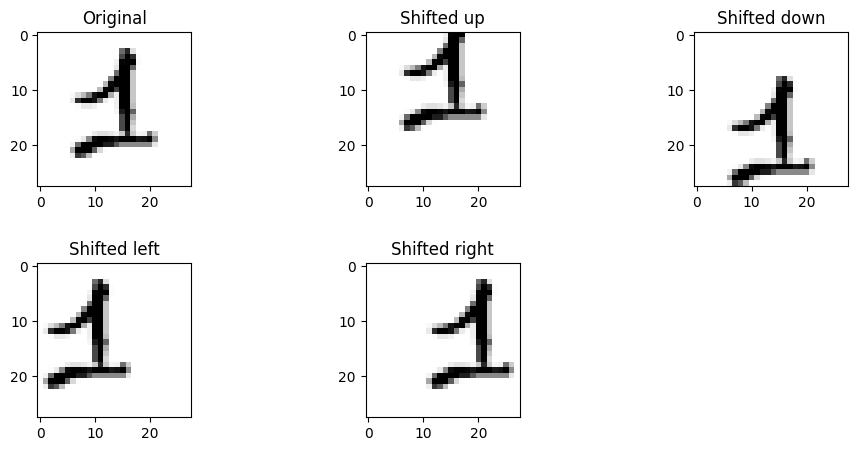

In [156]:
# Plot shifted images
plt.figure(figsize=(12, 5))
plt.subplot(231)
plt.title("Original")
plt.imshow(img_data.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(232)
plt.title("Shifted up")
plt.imshow(up.reshape(28, 28),interpolation="nearest", cmap="Greys")
plt.subplot(233)
plt.title("Shifted down")
plt.imshow(down.reshape(28, 28),interpolation="nearest", cmap="Greys")
plt.subplot(234)
plt.title("Shifted left")
plt.imshow(left.reshape(28, 28),interpolation="nearest", cmap="Greys")
plt.subplot(235)
plt.title("Shifted right")
plt.imshow(right.reshape(28, 28),interpolation="nearest", cmap="Greys")

# Adjust the layout
plt.subplots_adjust(hspace=0.5)

### Creating the Augmented Dataset

In [157]:
# Convert the training datasets to lists to make modification easier
X_train_shifted = list(X_train)
y_train_shifted = list(y_train)

# Define the number of pixels to shift by
shift_px = 1

# Loop through each image and label
for img, label in zip(X_train, y_train):
    # Call function to get shifted images
    up, down, left, right = shift_image(img, shift_px)

    # Append shifted images and their labels to the augmented datasets
    X_train_shifted.extend([up, down, left, right])
    y_train_shifted.extend([label, label, label, label])

# Convert lists back to numpy arrays
X_train_shifted = np.array(X_train_shifted)
y_train_shifted = np.array(y_train_shifted)

Check the shape of the training datasets.

In [158]:
X_train.shape

(56000, 784)

In [159]:
y_train.shape

(56000,)

In [160]:
X_train_shifted.shape

(280000, 784)

In [161]:
y_train_shifted.shape

(280000,)

Now we will shuffle the training set to shifted images aren't grouped together.

In [162]:
shuffle_index = np.random.permutation(len(X_train_shifted))
X_train_shifted = X_train_shifted[shuffle_index]
y_train_shifted = y_train_shifted[shuffle_index]

## K-nearest Neighbor Model
Start with simple KNN model as the baseline, using the unaugmented dataset.

### Model Creation

In [163]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9700714285714286

Now we'll train another KNN model using the augmented dataset.

In [164]:
knn_clf_augmented = KNeighborsClassifier()
knn_clf_augmented.fit(X_train_shifted, y_train_shifted)
knn_clf_augmented.score(X_test, y_test)

0.9789285714285715

We see the accuracy has improved 0.9% by creating and training on an augmented dataset.